In [1]:
library(ISLR)
library(MASS)
library(class)
dim(Boston)
names(Boston)
summary(Boston)
?Boston

[1] 506  14

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [2]:
crim01 = rep(0,nrow(Boston))
crim01[Boston$crim>median(Boston$crim)]=1
Boston01 = data.frame(Boston, crim01)
summary(Boston01)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

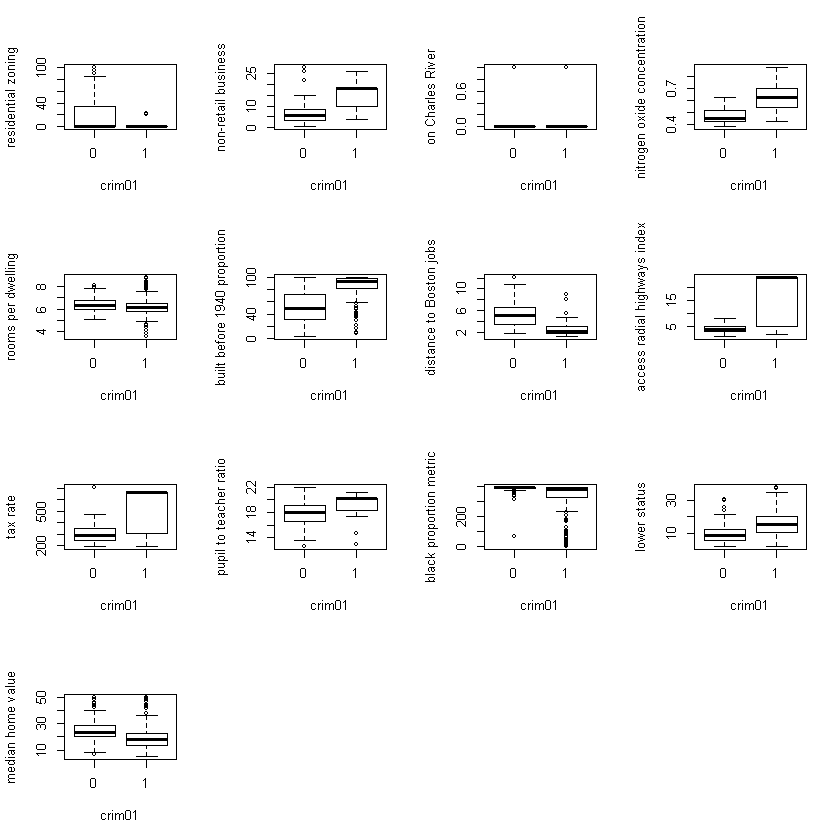

In [3]:
par(mfrow=c(4,4))
boxplot(zn~crim01, data=Boston01, xlab="crim01", ylab="residential zoning")
boxplot(indus~crim01, data=Boston01, xlab="crim01", ylab="non-retail business")
boxplot(chas~crim01, data=Boston01, xlab="crim01", ylab="on Charles River")
boxplot(nox~crim01, data=Boston01, xlab="crim01", ylab="nitrogen oxide concentration")
boxplot(rm~crim01, data=Boston01, xlab="crim01", ylab="rooms per dwelling")
boxplot(age~crim01, data=Boston01, xlab="crim01", ylab="built before 1940 proportion")
boxplot(dis~crim01, data=Boston01, xlab="crim01", ylab="distance to Boston jobs")
boxplot(rad~crim01, data=Boston01, xlab="crim01", ylab="access radial highways index")
boxplot(tax~crim01, data=Boston01, xlab="crim01", ylab="tax rate")
boxplot(ptratio~crim01, data=Boston01, xlab="crim01", ylab="pupil to teacher ratio")
boxplot(black~crim01, data=Boston01, xlab="crim01", ylab="black proportion metric")
boxplot(lstat~crim01, data=Boston01, xlab="crim01", ylab="lower status")
boxplot(medv~crim01, data=Boston01, xlab="crim01", ylab="median home value")

From this it looks like the following variables might be promising candidates as predictors: non-retail business, nitrogen oxide condentration, portion built before 1940, distance to Boston jobs, and access to highways.

In [4]:
cor(Boston01)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046,0.40939545
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453,-0.43615103
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252,0.60326017
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602,0.07009677
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208,0.72323480
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599,-0.15637178
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546,0.61393992
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287,-0.61634164
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262,0.61978625
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359,0.60874128


The strongest correlations with our crime rate flag appear to be: indus, nox, age, dis, and rad. 

In [5]:
#will randomly assign 30% of data to test set. 
set.seed(1)
split = as.matrix(runif(nrow(Boston01)))
Boston01Test = Boston01[split>0.7,] #again, comma is super important!
Boston01Train = Boston01[split<=0.7,] 
nrow(Boston01Test)
nrow(Boston01Train)

[1] 146

[1] 360

In [17]:
#let's try a glm with everything in
glmfit = glm(crim01~indus + chas + nox + rm + age + dis +rad + tax + ptratio + black + lstat + medv, data = Boston01Train)
summary(glmfit)


Call:
glm(formula = crim01 ~ indus + chas + nox + rm + age + dis + 
    rad + tax + ptratio + black + lstat + medv, data = Boston01Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.64276  -0.20166  -0.05624   0.17129   0.88872  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4232020  0.4271375  -3.332 0.000955 ***
indus        0.0043242  0.0048755   0.887 0.375731    
chas         0.0272931  0.0673788   0.405 0.685676    
nox          1.8690690  0.3107044   6.016 4.55e-09 ***
rm           0.0163998  0.0383504   0.428 0.669186    
age          0.0030524  0.0010832   2.818 0.005109 ** 
dis         -0.0046626  0.0145155  -0.321 0.748242    
rad          0.0172941  0.0051783   3.340 0.000930 ***
tax         -0.0002908  0.0003017  -0.964 0.335875    
ptratio      0.0187263  0.0105425   1.776 0.076565 .  
black       -0.0002454  0.0002268  -1.082 0.279996    
lstat        0.0033465  0.0045641   0.733 0.463922    
medv   

medv is also showing up as significant. indus and dis are not significant so must be correlated with other predictors. ptratio would be signifiant at the 10% level. Will try a glm witho ptratio and medv and then one without them.

In [6]:
glmfit = glm(crim01~nox + age + rad, data = Boston01Train, family=binomial)
summary(glmfit)
glmprobs=predict(glmfit, Boston01Test, type="response")
glmpred=rep(0, nrow(Boston01Test))
glmpred[glmprobs>.5]=1
table(glmpred, Boston01Test$crim01)
mean(glmpred==Boston01Test$crim01)
mean(glmpred!=Boston01Test$crim01)


Call:
glm(formula = crim01 ~ nox + age + rad, family = binomial, data = Boston01Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.96063  -0.28690   0.00032   0.01510   2.68473  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.11182    2.46600  -7.345 2.06e-13 ***
nox          26.64955    4.65073   5.730 1.00e-08 ***
age           0.01213    0.01011   1.200     0.23    
rad           0.55320    0.11661   4.744 2.09e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.02  on 359  degrees of freedom
Residual deviance: 179.98  on 356  degrees of freedom
AIC: 187.98

Number of Fisher Scoring iterations: 8


       
glmpred  0  1
      0 67 15
      1  8 56

[1] 0.8424658

[1] 0.1575342

Hmm removing the other vars made age insignificant. Will put them back in and see if I get a better test error.

In [7]:
glmfit = glm(crim01~indus + nox + age + dis + rad, data = Boston01Train, family=binomial)
summary(glmfit)
glmprobs=predict(glmfit, Boston01Test, type="response")
glmpred=rep(0, nrow(Boston01Test))
glmpred[glmprobs>.5]=1
table(glmpred, Boston01Test$crim01)
mean(glmpred==Boston01Test$crim01)
mean(glmpred!=Boston01Test$crim01)


Call:
glm(formula = crim01 ~ indus + nox + age + dis + rad, family = binomial, 
    data = Boston01Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.10446  -0.26015   0.00020   0.00582   2.81042  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -23.14460    4.32137  -5.356 8.52e-08 ***
indus        -0.07855    0.04897  -1.604    0.109    
nox          36.37836    7.67274   4.741 2.12e-06 ***
age           0.01526    0.01054   1.448    0.148    
dis           0.15285    0.16670   0.917    0.359    
rad           0.52077    0.11892   4.379 1.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.02  on 359  degrees of freedom
Residual deviance: 176.38  on 354  degrees of freedom
AIC: 188.38

Number of Fisher Scoring iterations: 8


       
glmpred  0  1
      0 67 16
      1  8 55

[1] 0.8356164

[1] 0.1643836

Hmm. Will try indus + nox + rad now.

In [8]:
glmfit = glm(crim01~indus + nox + rad, data = Boston01Train, family=binomial)
summary(glmfit)
glmprobs=predict(glmfit, Boston01Test, type="response")
glmpred=rep(0, nrow(Boston01Test))
glmpred[glmprobs>.5]=1
table(glmpred, Boston01Test$crim01)
mean(glmpred==Boston01Test$crim01)
mean(glmpred!=Boston01Test$crim01)


Call:
glm(formula = crim01 ~ indus + nox + rad, family = binomial, 
    data = Boston01Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.14053  -0.29360   0.00022   0.00613   2.66912  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -21.29874    3.12529  -6.815 9.43e-12 ***
indus        -0.07357    0.04858  -1.515     0.13    
nox          36.03226    6.20064   5.811 6.21e-09 ***
rad           0.51952    0.11767   4.415 1.01e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.02  on 359  degrees of freedom
Residual deviance: 179.00  on 356  degrees of freedom
AIC: 187

Number of Fisher Scoring iterations: 8


       
glmpred  0  1
      0 67 15
      1  8 56

[1] 0.8424658

[1] 0.1575342

Tied for lowest test error so far. Will try adding ptratio and medv to the original list above.

In [10]:
glmfit = glm(crim01~indus + dis + nox + age + rad + ptratio + medv, data = Boston01Train, family=binomial)
summary(glmfit)
glmprobs=predict(glmfit, Boston01Test, type="response")
glmpred=rep(0, nrow(Boston01Test))
glmpred[glmprobs>.5]=1
table(glmpred, Boston01Test$crim01)
mean(glmpred==Boston01Test$crim01)
mean(glmpred!=Boston01Test$crim01)


Call:
glm(formula = crim01 ~ indus + dis + nox + age + rad + ptratio + 
    medv, family = binomial, data = Boston01Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.97404  -0.20674   0.00006   0.00485   3.15063  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -38.65542    6.90246  -5.600 2.14e-08 ***
indus        -0.07140    0.05083  -1.405  0.16017    
dis           0.40229    0.18756   2.145  0.03197 *  
nox          44.49812    8.73379   5.095 3.49e-07 ***
age           0.02754    0.01219   2.260  0.02381 *  
rad           0.53252    0.12960   4.109 3.97e-05 ***
ptratio       0.35103    0.11749   2.988  0.00281 ** 
medv          0.11758    0.03951   2.976  0.00292 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.02  on 359  degrees of freedom
Residual deviance: 162.26  on 352  degrees of freedom
AIC: 178.26

Numb

       
glmpred  0  1
      0 68 12
      1  7 59

[1] 0.869863

[1] 0.130137

Best result so far. If I were doing this in real life I'd try some interaction effects but to keep this managable I'll switch to the other fitting techniques now.

In [11]:
ldafit = lda(crim01~indus + dis + nox + age + rad + ptratio + medv, data = Boston01Train)
summary(ldafit)
ldapred=predict(ldafit, Boston01Test)
ldaclass=ldapred$class
table(ldaclass, Boston01Test$crim01)
mean(ldaclass==Boston01Test$crim01)
mean(ldaclass!=Boston01Test$crim01)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   14     -none- numeric  
scaling  7     -none- numeric  
lev      2     -none- character
svd      1     -none- numeric  
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

        
ldaclass  0  1
       0 68 16
       1  7 55

[1] 0.8424658

[1] 0.1575342

In [13]:
qdafit = qda(crim01~indus + dis + nox + age + rad + ptratio + medv, data = Boston01Train)
summary(qdafit)
qdapred=predict(qdafit, Boston01Test)
qdaclass=qdapred$class
table(qdaclass, Boston01Test$crim01)
mean(qdaclass==Boston01Test$crim01)
mean(qdaclass!=Boston01Test$crim01)

        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means   14     -none- numeric  
scaling 98     -none- numeric  
ldet     2     -none- numeric  
lev      2     -none- character
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

        
qdaclass  0  1
       0 75 17
       1  0 54

[1] 0.8835616

[1] 0.1164384

QDA actually does really well on this. I just want to graph the original crime rate variable against the other variables to maybe see why

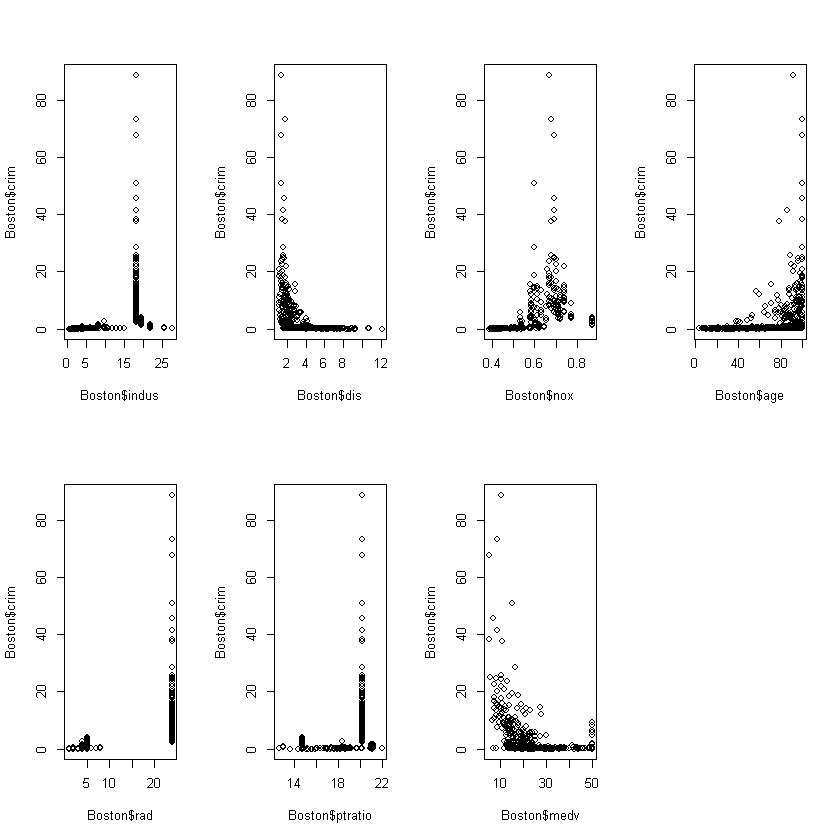

In [14]:
par(mfrow=c(2,4))
plot(Boston$indus, Boston$crim)
plot(Boston$dis, Boston$crim)
plot(Boston$nox, Boston$crim)
plot(Boston$age, Boston$crim)
plot(Boston$rad, Boston$crim)
plot(Boston$ptratio, Boston$crim)
plot(Boston$medv, Boston$crim)

Some of those look like they might be best modeled nonlinearly, like dis, nox, age, and medv. Maybe that's why QDA does well. 

In [15]:
library(class)
#need matrix function because knn wants a matrix not a vector for train and test
trainX=cbind(Boston01Train$indus, Boston01Train$dis, Boston01Train$nox, Boston01Train$age, Boston01Train$rad, Boston01Train$ptratio, Boston01Train$medv)
testX=cbind(Boston01Test$indus, Boston01Test$dis, Boston01Test$nox, Boston01Test$age, Boston01Test$rad, Boston01Test$ptratio, Boston01Test$medv)
set.seed(1)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=1)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=2)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=3)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=4)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=5)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)
knnpred=knn(trainX, testX, Boston01Train$crim01, k=6)
table(knnpred, Boston01Test$crim01)
mean(knnpred==Boston01Test$crim01)
mean(knnpred!=Boston01Test$crim01)

       
knnpred  0  1
      0 62 12
      1 13 59

[1] 0.8287671

[1] 0.1712329

       
knnpred  0  1
      0 58 11
      1 17 60

[1] 0.8082192

[1] 0.1917808

       
knnpred  0  1
      0 68 14
      1  7 57

[1] 0.8561644

[1] 0.1438356

       
knnpred  0  1
      0 64 10
      1 11 61

[1] 0.8561644

[1] 0.1438356

       
knnpred  0  1
      0 66 14
      1  9 57

[1] 0.8424658

[1] 0.1575342

       
knnpred  0  1
      0 62 13
      1 13 58

[1] 0.8219178

[1] 0.1780822

None of these outperform the QDA result.